In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from PyEMD import EMD, EEMD
import numpy as np
from sklearn.decomposition import PCA
from src.features.utilities import chop_timeseries

In [2]:
# Load data
with open('data/Case_2_a_only_basic_DQ', 'rb') as f:
    ((data1_1_df, data1_2_df, data1_3_df),(mean1_df,std1_df)) = pickle.load(f)

data1_df = pd.concat([data1_1_df,data1_2_df,data1_3_df],axis=0)
data1_df = data1_df * std1_df + mean1_df

(imin,_) = next((i, el) for i, el in enumerate(data1_df.HDEP.values) if el < 200)
data_df = data1_df.iloc[imin:]

In [3]:
data = data_df[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]]

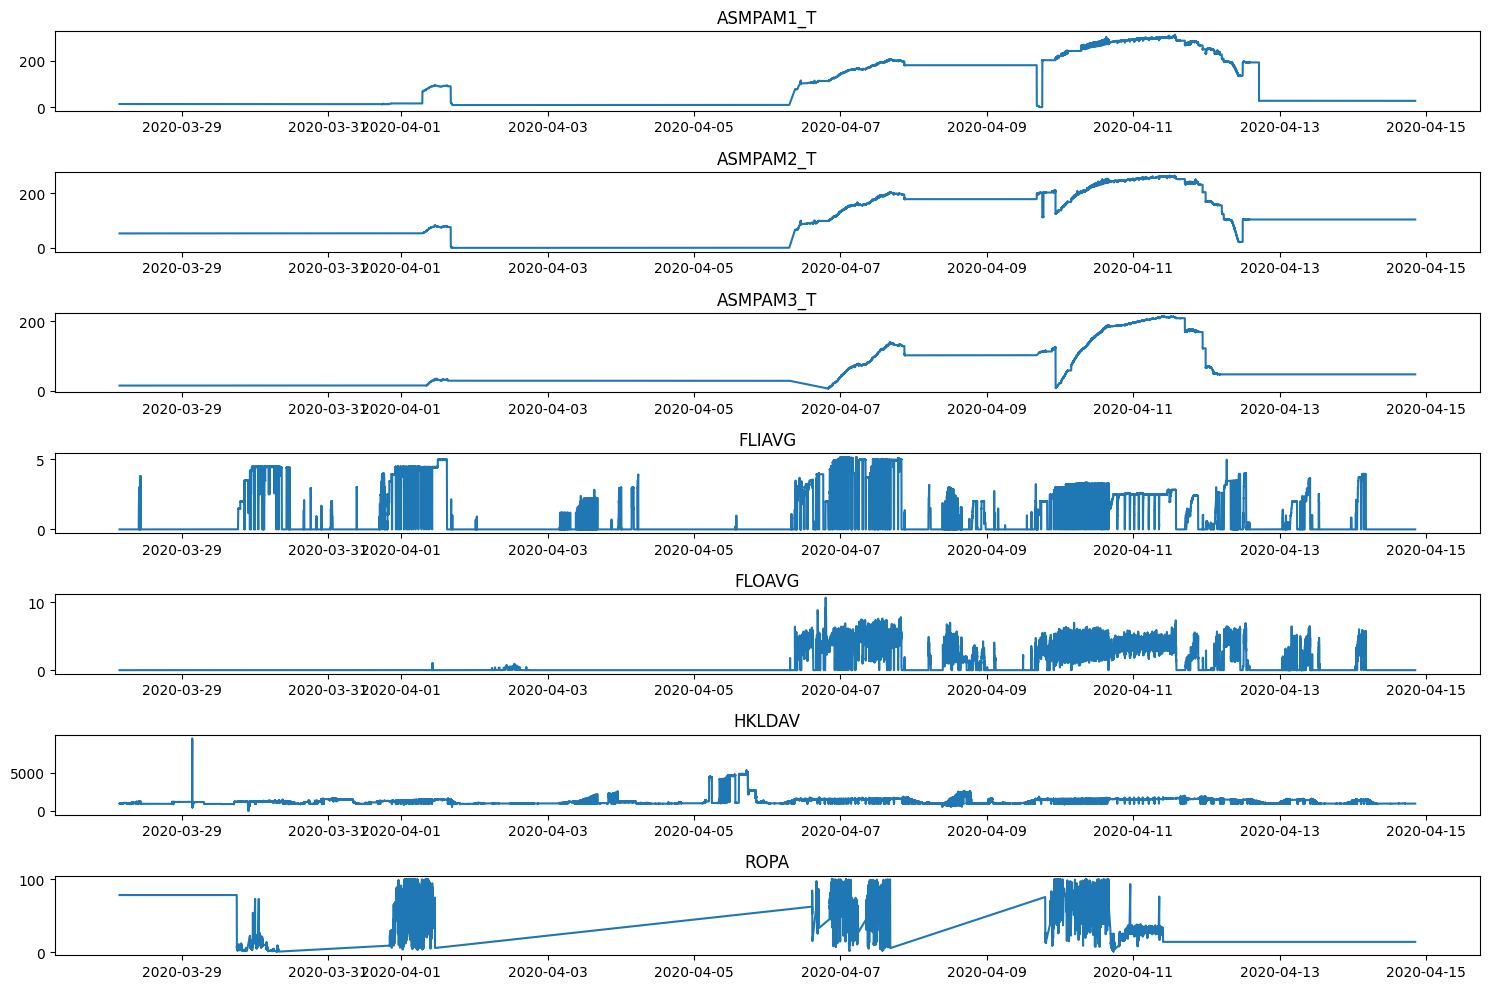

In [7]:
plt.subplots(len(data.keys()),1, figsize=(15, 10))
for i,key in enumerate(data.keys()):
    plt.subplot(len(data.keys()),1,i+1)
    plt.plot(data[key])
    plt.title(key)
plt.tight_layout()

In [8]:
data = data_df[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]].iloc[1130000:1230000]

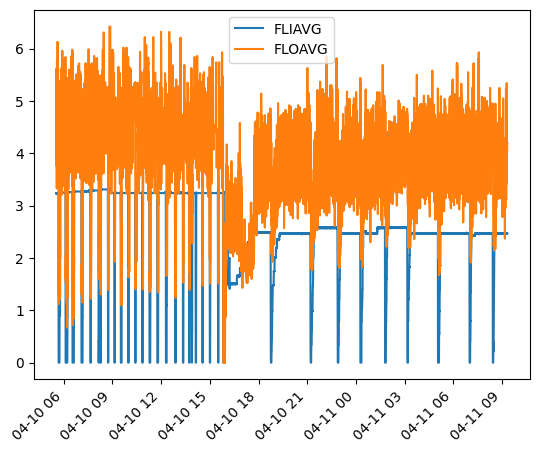

In [9]:
plt.plot(data[["FLIAVG", "FLOAVG"]])
plt.xticks(rotation=45, ha='right');
plt.legend(["FLIAVG", "FLOAVG"]);

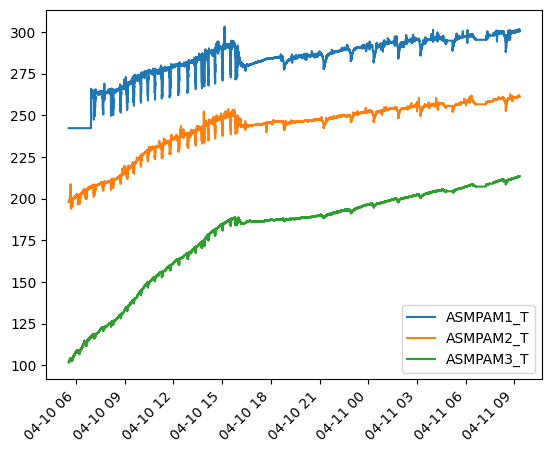

In [10]:
plt.plot(data[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T"]])
plt.xticks(rotation=45, ha='right');
plt.legend(["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T"]);

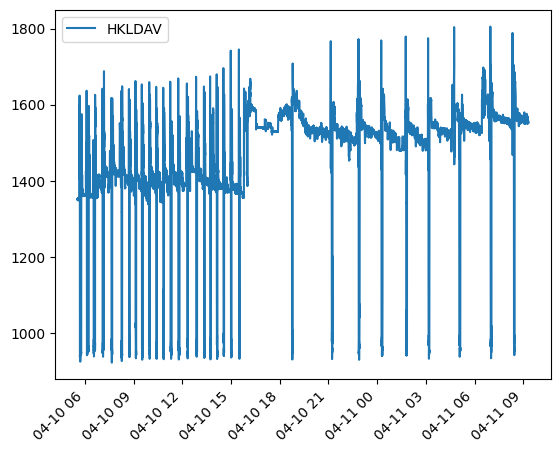

In [11]:
plt.plot(data["HKLDAV"])
plt.xticks(rotation=45, ha='right');
plt.legend(["HKLDAV"]);

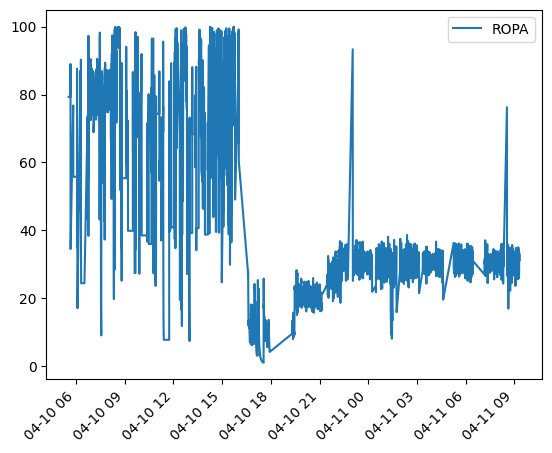

In [12]:
plt.plot(data[["ROPA"]])
plt.xticks(rotation=45, ha='right');
plt.legend(["ROPA"]);

In [13]:
data.mean()

ASMPAM1_T     283.414657
ASMPAM2_T     242.210855
ASMPAM3_T     179.197181
FLIAVG          2.503425
FLOAVG          3.774538
HKLDAV       1469.502046
ROPA           40.037923
dtype: float64

In [40]:
feature_names = ["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]
feature_types = ["DWT_complete_samples", "EEMD_complete_samples", "EMD_complete_samples", "EEMD_DWT_complete_samples", "EMD_DWT_complete_samples", "noDecomp_complete"]

path = lambda feature_name, feature_type: f"features/new_features/{feature_name}/{feature_type}.csv"

all_features = pd.DataFrame()
for feature_name in feature_names:
    for feature_type in feature_types:
        f = pd.read_csv(path(feature_name, feature_type))
        all_features = pd.concat([all_features, f], axis=1)

In [41]:
print(f"Shape of dataset before removal of NaN and other unused columns: {all_features.shape}")

Shape of dataset before removal of NaN and other unused columns: (100, 18928)


In [42]:
all_features.dropna(inplace=True, axis=1)
all_features.drop(columns=["Unnamed: 0"], inplace=True)

In [43]:
print(f"Shape of dataset after removal of NaN and other unused columns: {all_features.shape}")

Shape of dataset after removal of NaN and other unused columns: (100, 16212)


In [44]:
# Perform PCA on dataframe with all features
pca = PCA()
pca.fit(all_features)

PCA()

In [45]:
chopped_timeseries = chop_timeseries(data, 1000)

In [46]:
scores = pca.fit_transform(all_features)

In [47]:
cmap = plt.get_cmap("winter", len(chopped_timeseries))
timeseries_plot = []
for i, timeseries in enumerate(chopped_timeseries):
    timeseries_plot.append({'t': np.linspace(i*len(timeseries), (i+1)*len(timeseries), len(timeseries)), 'x': timeseries, 'col': cmap(i)})

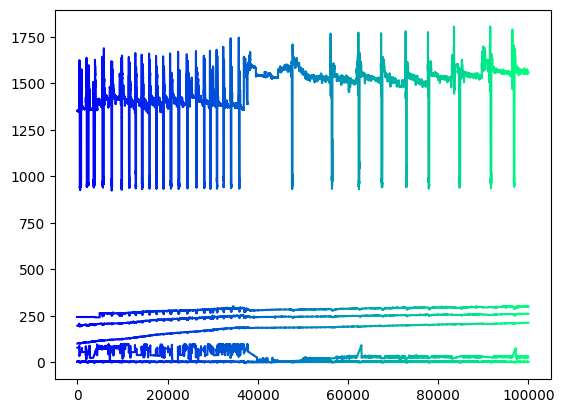

In [48]:
for timeserie in timeseries_plot:
    plt.plot(timeserie['t'], timeserie['x'], color=timeserie['col'])
plt.savefig("figures/timeseries.png")

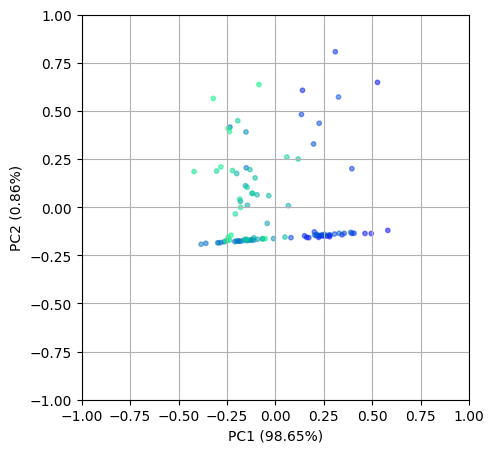

In [49]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")

plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

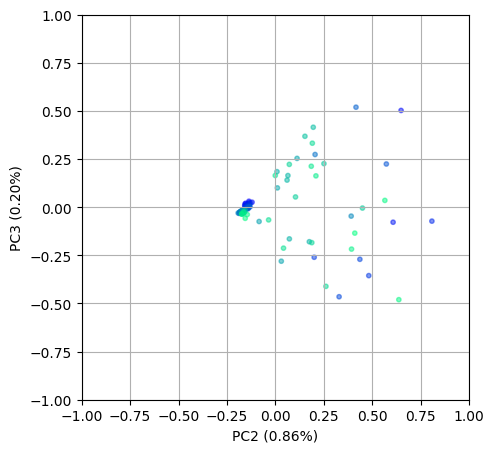

In [50]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,1]
ys = scores[:,2]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.ylabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

In [6]:
cmap = plt.get_cmap("winter", len(chopped_timeseries))
timeseries_plot = []
for i, timeseries in enumerate(chopped_timeseries):
    timeseries_plot.append({'t': np.linspace(i*len(timeseries), (i+1)*len(timeseries), len(timeseries)), 'x': timeseries, 'col': cmap(i)})

fig, ax = plt.subplots(7, 2, figsize=(20,20), constrained_layout=True)

for timeseries in timeseries_plot:
    for i, k in enumerate(timeseries['x'].keys()):
        plt.subplot(7, 2, 2*i+1)
        plt.plot(timeseries['t'], timeseries['x'][k], color=timeseries['col'])
        plt.title(k)
        plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 2)
xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 4)
xs = scores[:,2]
ys = scores[:,3]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, s=10, alpha=0.5, c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
plt.ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.2f}%)")
plt.grid()
plt.tight_layout()

#Remove the plot at subplot (7, 2, 8)
plt.delaxes(plt.subplot(7, 2, 8))

plt.show()
fig.savefig("figures/PCA.png", dpi=300)

NameError: name 'chopped_timeseries' is not defined

In [ ]:
all_features.dropna(axis=0, inplace=True)

In [7]:
all_features

NameError: name 'all_features' is not defined

In [8]:
# Perform PCA on dwt dataframe
pca = PCA()
pca.fit(all_features)

NameError: name 'all_features' is not defined

In [9]:
for i, timeserie in enumerate(timeseries_plot):
    if (i > 1075) and (i < 1250):
        plt.plot(timeserie['t'], timeserie['x'], color="red")
    elif (i > 1250) and (i < 1350):
        plt.plot(timeserie['t'], timeserie['x'], color="purple")
    elif (i > 400) and (i < 795):
        plt.plot(timeserie['t'], timeserie['x'], color="yellow")
    elif (i > 795) and (i < 876):
        plt.plot(timeserie['t'], timeserie['x'], color="pink")
    elif (i > 875) and (i < 935):
        plt.plot(timeserie['t'], timeserie['x'], color="green")
    elif(i > 360) and (i < 410):
        plt.plot(timeserie['t'], timeserie['x'], color="orange")
    else:
        plt.plot(timeserie['t'], timeserie['x'], color="blue") #color=timeserie['col'])
plt.savefig("figures/timeseries.png")

NameError: name 'timeseries_plot' is not defined

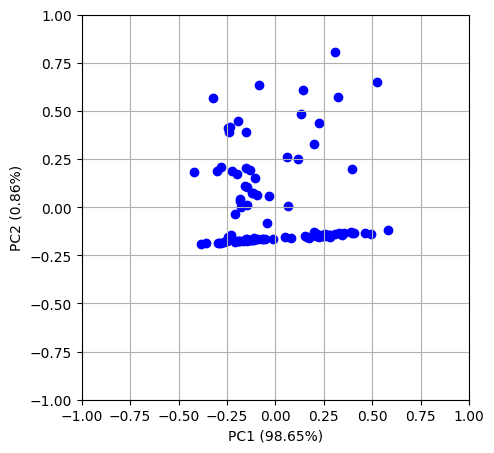

KeyboardInterrupt: 

In [322]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
for i, (x, y) in enumerate(zip(xs, ys)):
    if (i > 1075) and (i < 1250):
        plt.scatter(x * scalex, y * scaley, color="red")
    elif (i > 1250) and (i < 1350):
        plt.scatter(x * scalex, y * scaley, color="purple")
    elif (i > 400) and (i < 775):
        plt.scatter(x * scalex, y * scaley, color="yellow")
    elif (i > 795) and (i < 876):
        plt.scatter(x * scalex, y * scaley, color="pink")
    elif (i > 875) and (i < 935):
        plt.scatter(x * scalex, y * scaley, color="green")
    elif(i > 350) and (i < 410):
        plt.scatter(x * scalex, y * scaley, color="orange")
    else:
        plt.scatter(x * scalex, y * scaley, color="blue") #c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

In [ ]:
explained_variance = pca.explained_variance_ratio_[:10] / np.sum(pca.explained_variance_ratio_[:10]) * 100

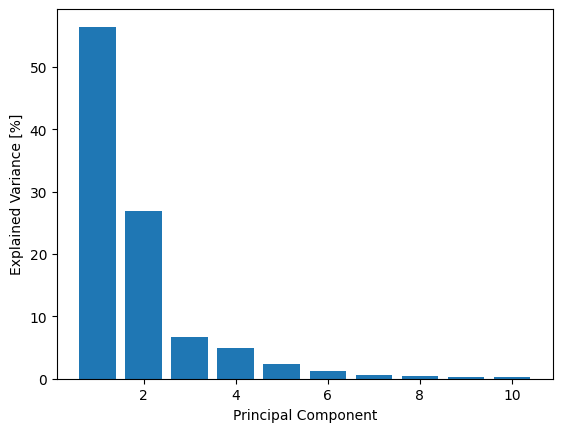

In [ ]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance [%]")
plt.show()